<a href="https://colab.research.google.com/github/Stuteee/Automobile-Prediction/blob/main/ML_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We first start by importing the necessary libraries for data preprocessing and visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We store the csv file in a variable called df making it easier to read the file

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml compute/ML Week 2/Copy of automobile_data.csv')

Next we read the top 5 rows of the table to check if the file has been imported correctly

In [ ]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that the file has been imported correctly, we start with the process of data cleaning. The first step is of checking for duplicated values in a dataset.

In [ ]:
df.duplicated().sum()

0

There are no duplicated values in the dataset, but as per the first 5 rows printed, there are '?' in the dataset which can be replaced by NaN values

In [ ]:
df.replace('?', np.NaN, inplace = True)

Now, we check if the '?' has been replaced with null/NaN values by printing the first 5 rows

In [ ]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The normalized losses column shows how the '?' has been replaced with NaN. So, now we check the null values in the dataset

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


We, next check the percentage of null values in the dataset to clean the dataset.

In [ ]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['price','peak-rpm','horsepower','stroke','bore','num-of-doors','normalized-losses']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

price: 1.95%
peak-rpm: 0.98%
horsepower: 0.98%
stroke: 1.95%
bore: 1.95%
num-of-doors: 0.98%
normalized-losses: 20.0%


Now, as per the percentages of missing values, we can drop rows containing missing values less than 5 percent.

In [ ]:
df.dropna(subset=['price','peak-rpm','horsepower','stroke','bore','num-of-doors'], inplace=True)

We first convert the column of normalized-losses to integer format so that we can implement additions

In [ ]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

Next, we check the distribution of normalized losses in the datset by plotting a histogram

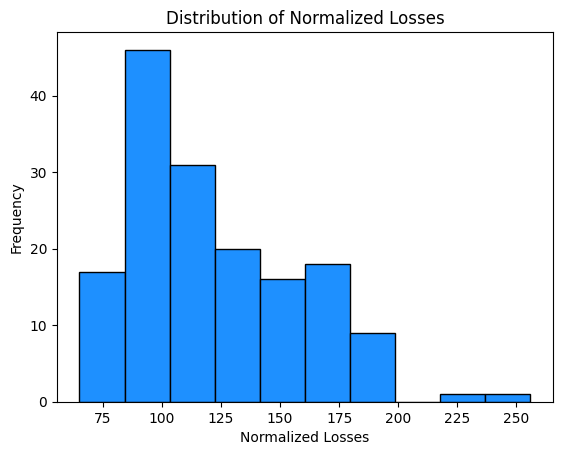

In [ ]:
plt.hist(df['normalized-losses'], bins=10, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of Normalized Losses')
plt.xlabel('Normalized Losses')
plt.ylabel('Frequency')
plt.show()

As, we see the data is skewed, we use median to fill the missing values in the dataset

In [ ]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)

<ipython-input-14-71f69a35196f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)


Now, we see if there are any null values in the dataset in general also

In [ ]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Next, we convert our column 'num-of-doors' column to integer format so that we can easily plot graphs for the same. But before, we check for the different types in the column

In [ ]:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,112
two,81


There are just two types, so we map them to integer values

In [ ]:
door_mapping = {
    'four': 4,
    'two': 2
}

df['num-of-doors'] = df['num-of-doors'].map(door_mapping)

Next, we do the same for 'num-of-cylinders' column to make it easier for plotting graphs. But before, check for different tpes present

In [ ]:
df['num-of-cylinders'].value_counts()

,count
num-of-cylinders,
four,153
six,24
five,10
eight,4
three,1
twelve,1


Now, we map accordingly

In [ ]:
cyl_mapping = {
    'six': 6,
    'eight': 8,
    'five': 5,
    'four': 4,
    'twelve': 12,
    'three': 3
}

df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_mapping)

We convert the price to float as its data type initially is object which cannot be used for visualizations

In [ ]:
df['price'] = df['price'].astype(int)

Conversion to int datatype

In [ ]:
df['horsepower'] = df['horsepower'].astype(int)

In [ ]:
df['peak-rpm'] = df['peak-rpm'].astype(int)

Now, we move to the part of visualizations, to see correlations between the different variables and the target variable 'price'. We first plot a correlation heatmap for all the numeric variables

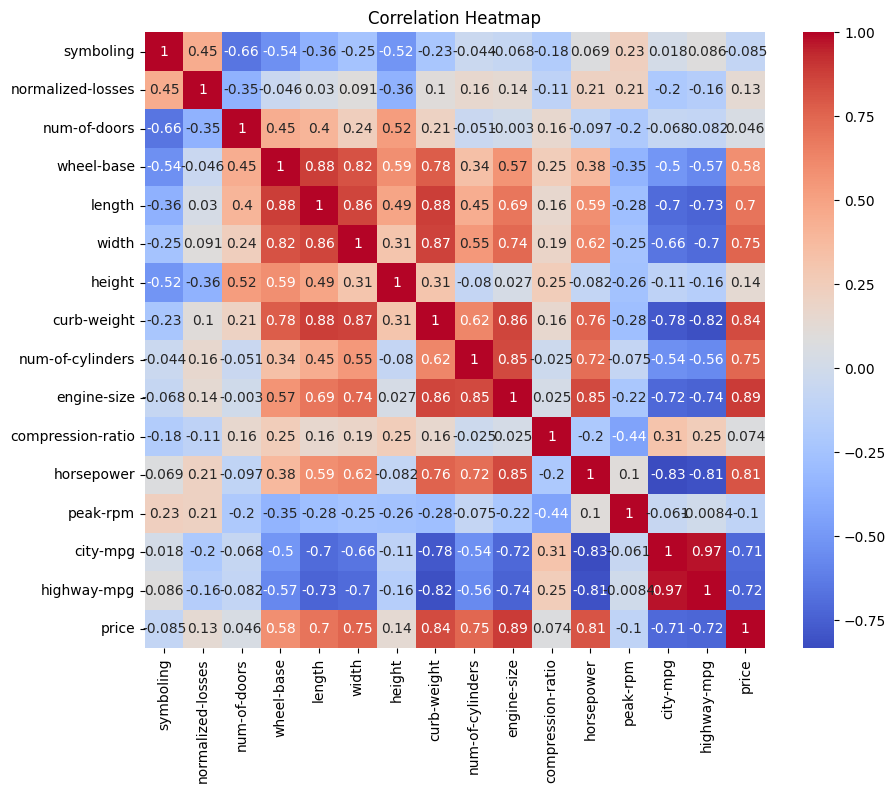

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We drop these columns as they have least correlation with our target attribute

In [ ]:
df.drop(columns=['symboling', 'normalized-losses','num-of-doors', 'height', 'stroke', 'compression-ratio', 'peak-rpm'], inplace=True)

We start with a few visualizations

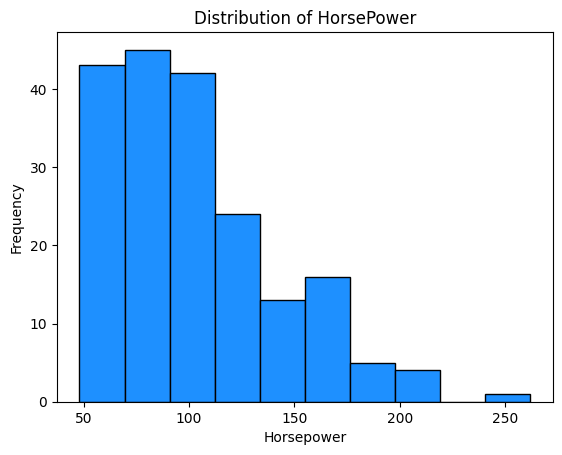

In [ ]:
plt.hist(df['horsepower'], bins=10, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of HorsePower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

***Observations:***


*   The data doesnt follow any particular trend



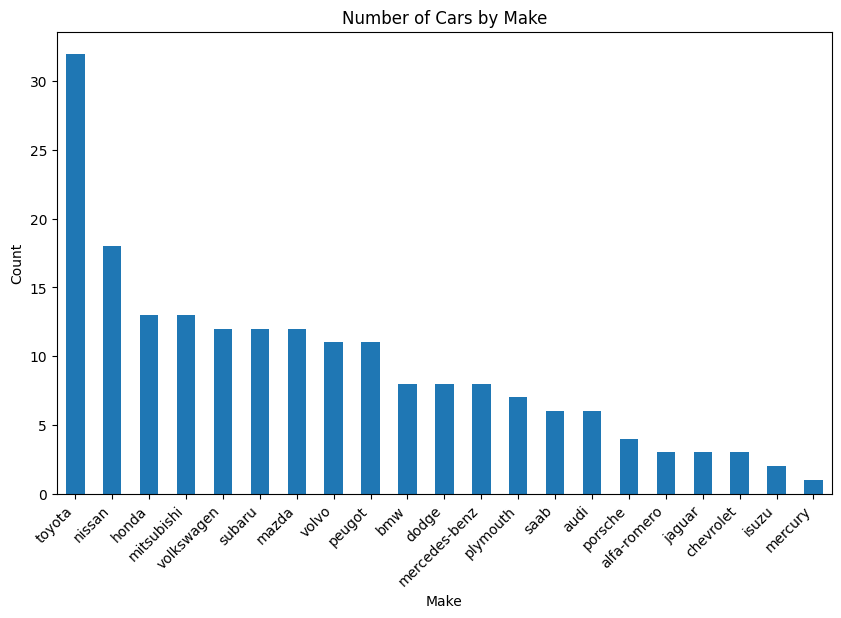

In [ ]:
df['make'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

***Observations:***


*   Maximum number of automobiles are of type Toyota followed by Nissan
*   Honda and Mitsubishi and Volkswagen, Subaru, Mazda have same frequency respectively
*   Least number of cars are of Isuzu and Mercury



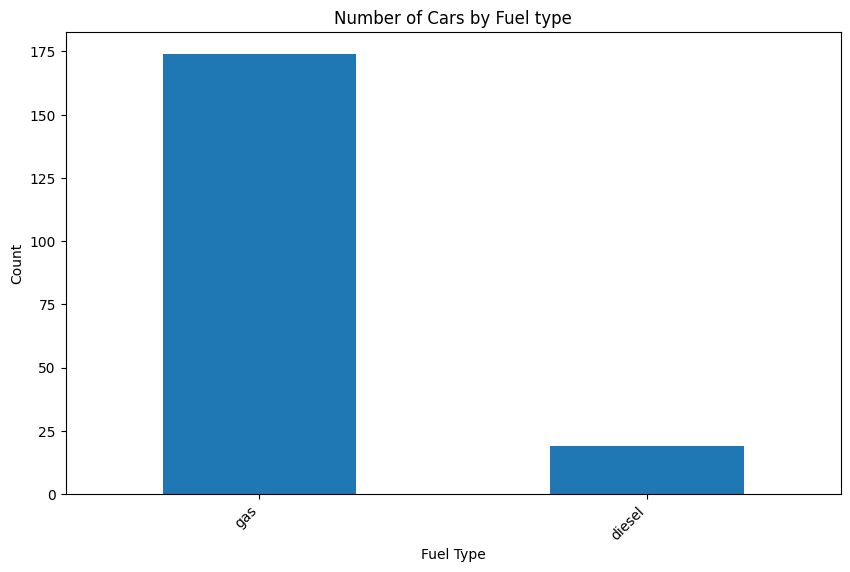

In [ ]:
df['fuel-type'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cars by Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

***Observations:***


*   The number of automobiles having fuel-type as gas is almost 6 times more than that of fuel-type diesel

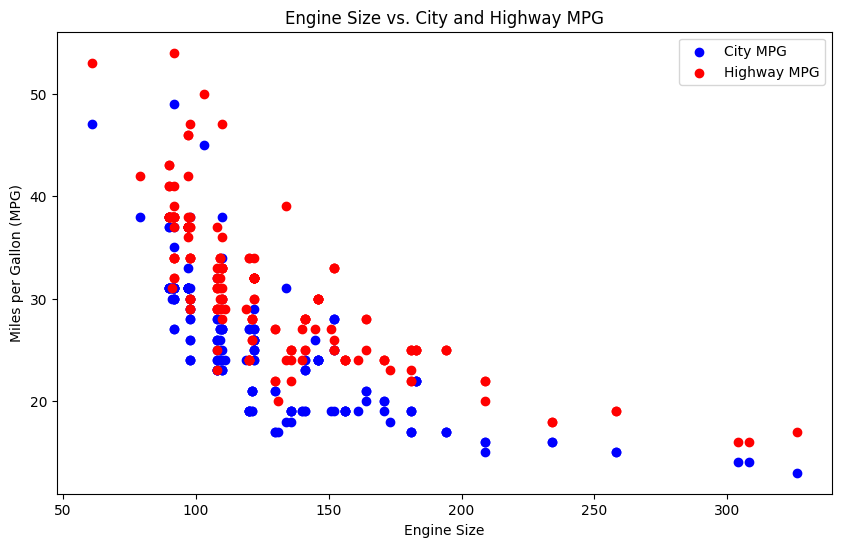

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine-size'], df['city-mpg'], color='blue', label='City MPG')
plt.scatter(df['engine-size'], df['highway-mpg'], color='red', label='Highway MPG')
plt.xlabel('Engine Size')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Engine Size vs. City and Highway MPG')
plt.legend()
plt.show()

***Observations:***


*   There is an overall negative correlation between engine size and miles per gallon (MPG)
*   The highway MPG is better and more than the city MPG



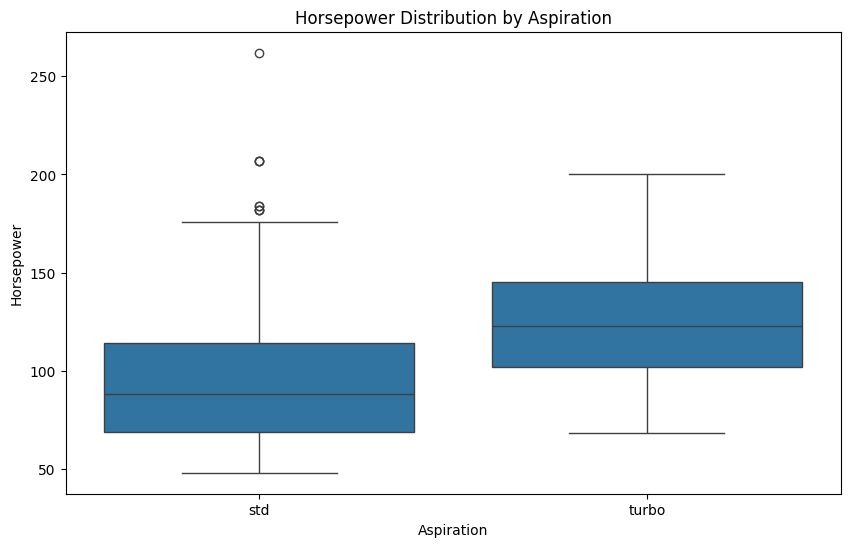

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='aspiration', y='horsepower', data=df)
plt.title('Horsepower Distribution by Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Horsepower')
plt.show()

***Observations:***


*   The distribution of values is more in std than in turbo

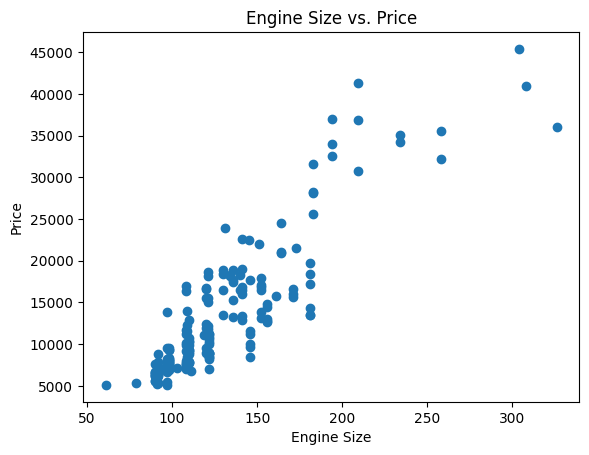

In [ ]:
plt.scatter(df['engine-size'], df['price'])
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

***Observations:***

*   As the size of engine increases, the price of the automobile also increases. There is a strong positive correlation between the two variables.    



We check if there are any outliers present in the dataset and correct them by applying the upper bound

In [ ]:
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

upper_bound = Q3 + 1.5 * IQR

df['price'] = df['price'].apply(lambda x: min(x, upper_bound))

In [ ]:
df.shape

(193, 19)

Next, we move on to PCA for which we require all the data to be numerical. So, we convert the categorical columns to numberical using one-hot encoding

In [ ]:
df.dtypes

,0
make,object
fuel-type,object
aspiration,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64
width,float64
curb-weight,int64


In [ ]:
nonnumeric = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']

In [ ]:
df_encoded = pd.get_dummies(df, columns=nonnumeric)

In [ ]:

df_encoded.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,False,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,True,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,True,False,False,False,False,False,False,True,False,False


In [ ]:

df_encoded.shape

(193, 58)

We concat the two dataframes by dropping the categorical in original dataframe and combining them with encoded dataframe

In [ ]:
df_combined = pd.concat([df.drop(columns=nonnumeric).reset_index(allow_duplicates=False, drop=True), df_encoded.reset_index(allow_duplicates=False,drop=True)], axis=1)
df_combined.isnull().sum()

,0
wheel-base,0
length,0
width,0
curb-weight,0
num-of-cylinders,0
...,...
fuel-system_idi,0
fuel-system_mfi,0
fuel-system_mpfi,0
fuel-system_spdi,0


In [ ]:
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

We reset the index and drop the index column

In [ ]:
df_combined.dropna(inplace=True)

<ipython-input-40-f5938bd9fb9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.dropna(inplace=True)


In [ ]:
df_combined = df_combined.reset_index()

In [ ]:
df_combined = df_combined.drop('index',axis=1)

for streamlit app

In [ ]:
df_combined.to_csv('final_data.csv', index=False)

In [ ]:
df.to_csv('streamlitdata.csv', index=False)

Now, we split the data as per x and y variables

In [ ]:
feature_columns = df_combined.columns[df_combined.columns != 'price'] # all columns that are not income
target_column = 'price'

In [ ]:
X = df_combined[feature_columns]
y = df_combined[target_column]

First we start with the PCA technique

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=0.96)
pca.fit(X)
X_reduced = pca.fit_transform(scale(X)) #To fit PCA on scaled features, just to view the PCs in a DF to view.
model = LinearRegression()

In [ ]:
pca.n_components_

30

In [ ]:
column_names = [f'PC{i+1}' for i in range(X_reduced.shape[1])]
X_reduced_train_df = pd.DataFrame(X_reduced, columns=column_names)
X_reduced_train_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.339949,-3.042426,0.310490,-0.549419,-0.618087,5.026455,3.195179,-1.230645,5.922586,-2.242806,...,-1.609055,0.326002,1.376566,0.602748,-1.202013,0.969272,0.591402,-0.405357,0.040138,0.205380
1,1.339949,-3.042426,0.310490,-0.549419,-0.618087,5.026455,3.195179,-1.230645,5.922586,-2.242806,...,-1.609055,0.326002,1.376566,0.602748,-1.202013,0.969272,0.591402,-0.405357,0.040138,0.205380
2,2.003430,-2.752126,-1.337923,0.353702,-1.108595,2.145705,4.461839,-0.199720,2.093673,-0.533981,...,-1.007587,0.109470,-1.944326,-0.060289,0.467561,2.821934,0.790131,-4.392960,-0.860324,2.021904
3,-0.307658,-0.305802,-1.529823,-0.516822,-0.187514,-1.090104,-2.522216,0.739914,1.027278,0.434661,...,-2.466593,-0.523047,-0.797657,-0.521404,-1.639821,0.678851,-0.041373,0.270579,-0.062980,-0.479321
4,1.403949,-1.006955,-1.108697,-1.297967,1.306893,-1.690491,-2.082869,1.104937,0.827541,-0.960468,...,-3.533044,0.244130,-1.611537,0.673322,1.583129,0.217255,1.882501,0.116097,0.913498,-1.385226


In [ ]:
X.head(5)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,False,False,True,False,False,False,False,True,False,False
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,True,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([18.64, 27.42, 33.56, 38.59, 43.45, 47.39, 51.13, 54.72, 58.03,
       61.2 , 64.03, 66.63, 69.13, 71.56, 73.77, 75.9 , 77.95, 79.88,
       81.74, 83.57, 85.39, 87.01, 88.56, 89.92, 91.19, 92.44, 93.51,
       94.5 , 95.36, 96.09])

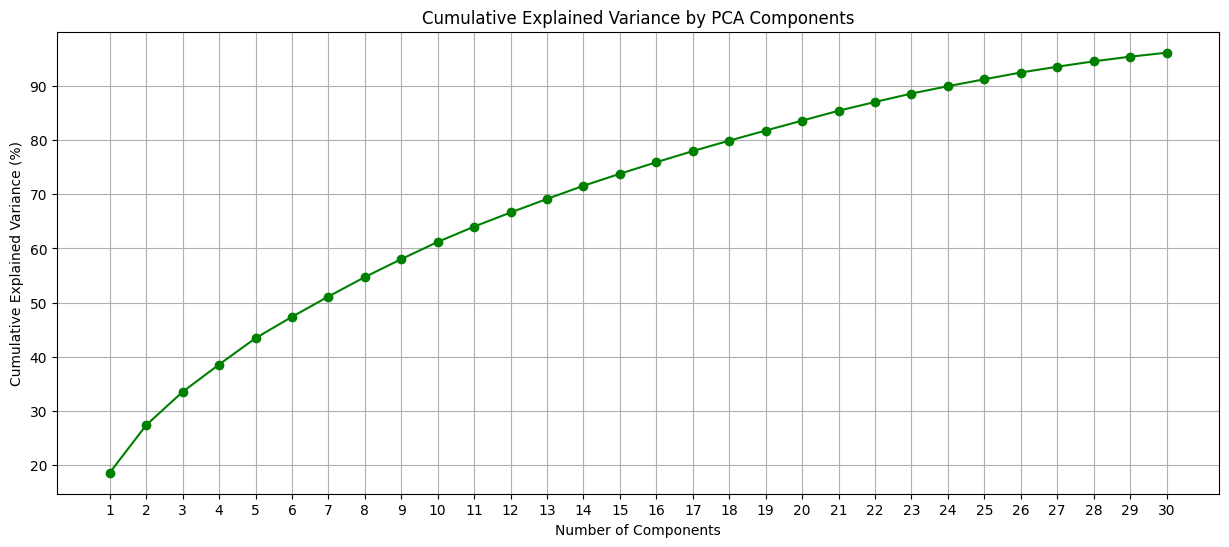

In [ ]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

# Plotting the progression of cumulative explained variance
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.show()

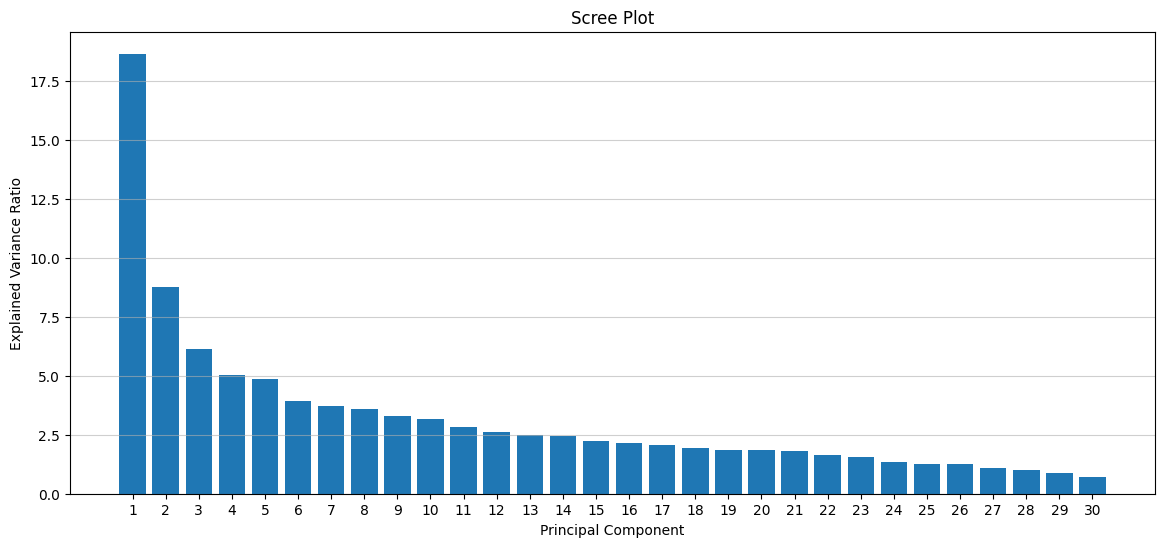

In [ ]:
explained_variance = pca.explained_variance_ratio_*100

plt.figure(figsize=(14, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y', alpha = 0.6)
plt.show()

split the data into the required columns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# prompt: import library for mean squared error

from sklearn.metrics import mean_squared_error


In [ ]:
mses = []
for i in range(1,32):
    X_reduced_train = pca.fit_transform(scale(X_train))[:,:i]
    X_reduced_test = pca.transform(scale(X_test))[:,:i]
    model.fit(X_reduced_train, y_train)
    pred = model.predict(X_reduced_test)
    mses.append(mean_squared_error(y_test, pred))
print(len(mses))
for i in range(1,31):
    print(f'{i} : {np.sqrt(mses[i])}')

31
1 : 2997.540506706051
2 : 2987.6892728558296
3 : 2927.2297171379923
4 : 2480.908294551886
5 : 2326.4241485777643
6 : 2346.996829737274
7 : 2335.9102085015725
8 : 2342.580925238184
9 : 2386.1577151136207
10 : 2396.7250118688758
11 : 2381.15006269158
12 : 2427.8970157207636
13 : 2445.4959784889893
14 : 2425.006164317134
15 : 2416.7889531920296
16 : 2421.969306714404
17 : 2475.9556260932927
18 : 2333.8019387736895
19 : 2294.888481610149
20 : 2295.4977017416604
21 : 1997.7512131917658
22 : 2042.8266424032063
23 : 2055.946376569123
24 : 2103.2965675979403
25 : 2050.4165881547806
26 : 2045.8078057179812
27 : 1972.2599529360432
28 : 1970.8331631003266
29 : 1970.8331631003266
30 : 1970.8331631003266


In [ ]:
rmses = [np.sqrt(mse) for mse in mses]

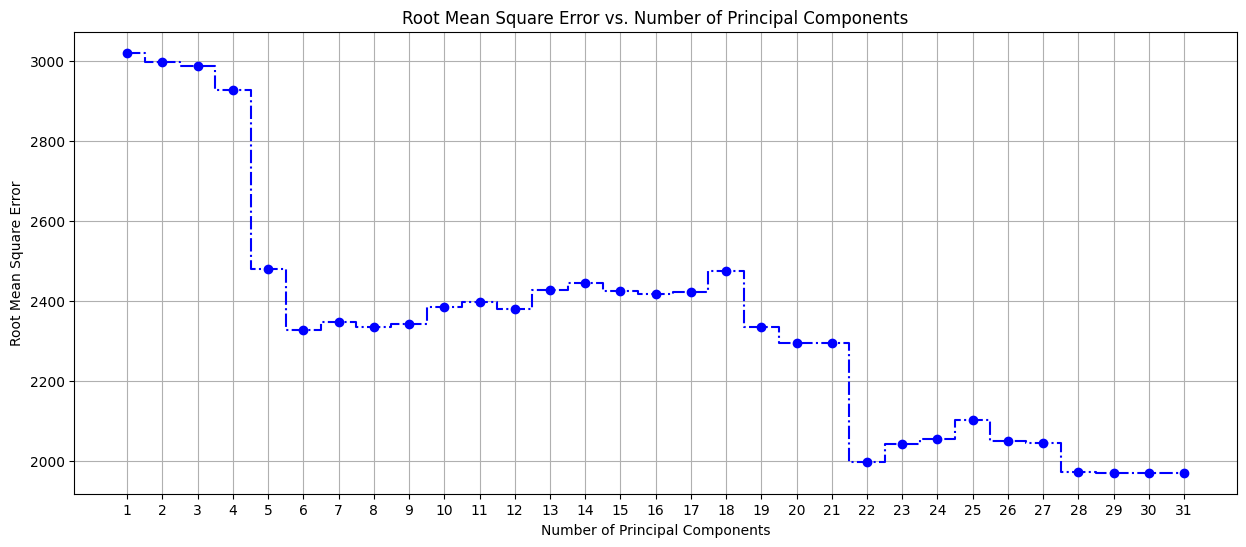

In [ ]:
plt.figure(figsize=(15, 6))
#Searched for cooler seaborn.lineplot and i found this lol
plt.step(range(1, 32), rmses, where='mid', color='b', linestyle='-.', marker='o')
plt.title('Root Mean Square Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Root Mean Square Error')
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()

as after 29 its all the same, we just keep 29 components

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))[:,:29]
X_reduced_test = pca.transform(scale(X_test))[:,:29]

In [ ]:
model.fit(X_reduced_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

print(f"Mean Absolute Error: {mae}")
y_train_pred = model.predict(X_reduced_train)
y_test_pred = model.predict(X_reduced_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training Root Mean Squared Error: {np.sqrt(train_mse)}")
print(f"Testing Root Mean Squared Error: {np.sqrt(test_mse)}")

Mean Absolute Error: 1599.4201805393316
Training Mean Squared Error: 2240182.5821966603
Training Root Mean Squared Error: 1496.723949897462
Testing Root Mean Squared Error: 1970.8331631003266


In [ ]:
mean_pred = y_train.mean()
baseline_mse = mean_squared_error(y_test, [mean_pred] * len(y_test))
print(f"Baseline MSE (mean predictor): {baseline_mse}")

Baseline MSE (mean predictor): 44539897.85957676


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print(f"R-squared (test): {r2}")
r2 = r2_score(y_train, y_train_pred)
print(f"R-squared (train): {r2}")

R-squared (test): 0.9116339080640603
R-squared (train): 0.9517399388882308


In [ ]:
import joblib
import pickle
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(model, 'trained_model.pkl', )

['trained_model.pkl']